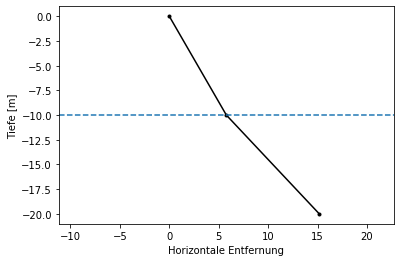

In [18]:
import numpy as np
import matplotlib.pyplot as plt


## Aufgabe 1) Brechnung an einer Grenzfläche 

v = np.array([2700,3700])
alpha_1 = 30 # Winkel zwischen Lot auf die Grenzfläche und Strahl

alpha_1 = np.deg2rad(alpha_1)
alpha_2 = np.arcsin(np.sin((alpha_1))*v[1]/v[0])

z = np.array([0,-10,-20])
x1 = np.tan(alpha_1)*(z[0]-z[1])
x2 = np.tan(alpha_2)*(z[1]-z[2])
plt.plot([0,x1,x1+x2],z,'k.-')
plt.xlabel('Horizontale Entfernung')
plt.ylabel('Tiefe [m]')
plt.axhline(y=z[1],linestyle='--')
plt.axis('equal')
plt.xlim([0,2*x1])
plt.show()

### Mögliche Aufgaben

1.) Berechnen Sie für die gegebenen GEschwindigkeiten den kritischen Winkel und stellen Sie den Strahlverlauf dar. Beschreiben Sie den Strahlverlauf . 
2.) Wie muss bei einem Winkel von 60° v2 gewählt werden, damit eine kritisch refraktierte Welle auftritt ? 


In [19]:
v2 = v[0]/np.sin(alpha_1)
print(v2)

alpha_crit = np.arcsin(v[0]/v[1])*180/np.pi
print(alpha_crit)


5400.000000000001
46.86374112870422


#  Seismische Wellen an einer Grenzfläche


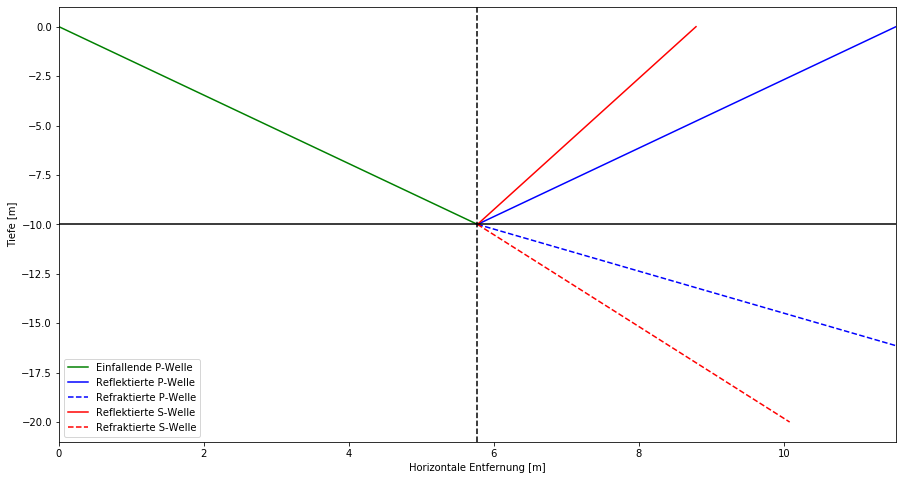

In [17]:
## Seismische Wellen an einer Grenzfläche
def get_all_alphas(alpha,d=10):
    if alpha[0] != 0:
        p = np.sin(alpha[0])/v[0]
    else:
        p = np.sin(alpha[2])/v[2]
    alpha[:] = np.arcsin(p*v[:])
    x = -np.tan(alpha)*d
    return x

#Einfallswinkel
Winkel=30
# Geschwindigkeit der ersten Schicht
v1=2700
# Geschwindigkeit der zweiten Schicht
v2=3700
 
#---------------------    
vp = np.array([v1,v2])
vs = vp/np.sqrt(3)
alpha_in = np.deg2rad(Winkel)
z = np.array([0,-10,-20])
v = np.hstack((vp,vs))

alpha = np.zeros(4)

alpha[0] = alpha_in # Ursprüngliche Welle ist P-Welle
#alpha[2] = alpha_in # Ursprüngliche Welle ist S-Welle

###
x0 = np.tan(alpha_in)*(z[0]-z[1])
plt.figure(figsize=(15,8))
if alpha[0]!=0:
    plt.plot([0,x0],[z[0],z[1]],'g-',label = 'Einfallende P-Welle')
else:
    plt.plot([0,x0],[z[0],z[1]],'g-',label = 'Einfallende S-Welle')
    

x = get_all_alphas(alpha,z[2]-z[1])


plt.plot([x0,x0+x[0]],[z[1],z[0]],'b-',label='Reflektierte P-Welle') # reflektierte P
plt.plot([x0,x0+x[1]],[z[1],z[2]],'b--',label='Refraktierte P-Welle') # P in Schicht 2
plt.plot([x0,x0+x[2]],[z[1],z[0]],'r-',label='Reflektierte S-Welle') # reflektierte S
plt.plot([x0,x0+x[3]],[z[1],z[2]],'r--',label='Refraktierte S-Welle') # S in Schicht 2

plt.axvline(x0,Color='k',linestyle = '--')
plt.axhline(z[1],Color='k',linestyle='-')

plt.legend()
plt.xlim([0,2*x0])
plt.xlabel('Horizontale Entfernung [m]')
plt.ylabel('Tiefe [m]')
#plt.grid('off')
plt.show()

